<a href="https://colab.research.google.com/github/gr-oll/susFin/blob/main/Finance_HW_2_Simon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [196]:
import pandas as pd
import io
import requests

**Exercise 1**

In [197]:
url = "https://github.com/gr-oll/susFin/blob/main/Data/Static.xlsx?raw=true"
response = requests.get(url)
Static = pd.read_excel(io.BytesIO(response.content))

In [198]:
Static = Static.rename(columns={'Name': 'NAME'})

In [199]:
print(Static.head())


           ISIN                                NAME Country Region
0  AN8068571086                        SCHLUMBERGER      US   AMER
1  ARALUA010258                               ALUAR      AR     EM
2  ARP125991090                BANCO BBVA ARGENTINA      AR     EM
3  ARSIDE010029  TERNIUM ARGENTINA SOCIEDAD ANONIMA      AR     EM
4  AT000000STR1                          STRABAG SE      AT    EUR


In [200]:
url = "https://github.com/gr-oll/susFin/blob/main/Data/DS_EScore_Y.xlsx?raw=true"
response = requests.get(url)
Escore = pd.read_excel(io.BytesIO(response.content))

In [201]:
Escore = pd.melt(Escore, id_vars=['NAME','ISIN'], var_name='DATE', value_name='ESCORE')

In [202]:
print(Escore.head())

                                 NAME          ISIN  DATE  ESCORE
0                        SCHLUMBERGER  AN8068571086  1999     NaN
1                               ALUAR  ARALUA010258  1999     NaN
2                BANCO BBVA ARGENTINA  ARP125991090  1999     NaN
3  TERNIUM ARGENTINA SOCIEDAD ANONIMA  ARSIDE010029  1999     NaN
4                          STRABAG SE  AT000000STR1  1999     NaN


In [203]:
Merged = pd.merge(Static , Escore, on=('NAME','ISIN'))
print(Merged)

               ISIN          NAME Country Region  DATE  ESCORE
0      AN8068571086  SCHLUMBERGER      US   AMER  1999     NaN
1      AN8068571086  SCHLUMBERGER      US   AMER  2000     NaN
2      AN8068571086  SCHLUMBERGER      US   AMER  2001     NaN
3      AN8068571086  SCHLUMBERGER      US   AMER  2002   53.65
4      AN8068571086  SCHLUMBERGER      US   AMER  2003   23.33
...             ...           ...     ...    ...   ...     ...
62695  ZAE000322095        NAMPAK      ZA     EM  2019   23.19
62696  ZAE000322095        NAMPAK      ZA     EM  2020   29.18
62697  ZAE000322095        NAMPAK      ZA     EM  2021   32.98
62698  ZAE000322095        NAMPAK      ZA     EM  2022   32.27
62699  ZAE000322095        NAMPAK      ZA     EM  2023   28.72

[62700 rows x 6 columns]


In [204]:
Merged = Merged[Merged['Region'] == 'PAC']

In [205]:
print(Merged.head)

<bound method NDFrame.head of                ISIN                          NAME Country Region  DATE  ESCORE
425    AU000000ABC7  ADBRI DEAD - DELIST.02/07/24      AU    PAC  1999     NaN
426    AU000000ABC7  ADBRI DEAD - DELIST.02/07/24      AU    PAC  2000     NaN
427    AU000000ABC7  ADBRI DEAD - DELIST.02/07/24      AU    PAC  2001     NaN
428    AU000000ABC7  ADBRI DEAD - DELIST.02/07/24      AU    PAC  2002     NaN
429    AU000000ABC7  ADBRI DEAD - DELIST.02/07/24      AU    PAC  2003     NaN
...             ...                           ...     ...    ...   ...     ...
60070  US89677Q1076        TRIP COM GROUP ADR 1:1      SG    PAC  2019   41.10
60071  US89677Q1076        TRIP COM GROUP ADR 1:1      SG    PAC  2020   44.19
60072  US89677Q1076        TRIP COM GROUP ADR 1:1      SG    PAC  2021   40.79
60073  US89677Q1076        TRIP COM GROUP ADR 1:1      SG    PAC  2022   43.66
60074  US89677Q1076        TRIP COM GROUP ADR 1:1      SG    PAC  2023     NaN

[12575 rows x 6 colum

In [206]:
Merged = Merged[(Merged['DATE'] >= 2013) & (Merged['DATE']<= 2024)]

In [207]:
print(Merged)

               ISIN                          NAME Country Region  DATE  ESCORE
439    AU000000ABC7  ADBRI DEAD - DELIST.02/07/24      AU    PAC  2013   61.76
440    AU000000ABC7  ADBRI DEAD - DELIST.02/07/24      AU    PAC  2014   61.56
441    AU000000ABC7  ADBRI DEAD - DELIST.02/07/24      AU    PAC  2015   58.22
442    AU000000ABC7  ADBRI DEAD - DELIST.02/07/24      AU    PAC  2016   56.38
443    AU000000ABC7  ADBRI DEAD - DELIST.02/07/24      AU    PAC  2017   58.51
...             ...                           ...     ...    ...   ...     ...
60070  US89677Q1076        TRIP COM GROUP ADR 1:1      SG    PAC  2019   41.10
60071  US89677Q1076        TRIP COM GROUP ADR 1:1      SG    PAC  2020   44.19
60072  US89677Q1076        TRIP COM GROUP ADR 1:1      SG    PAC  2021   40.79
60073  US89677Q1076        TRIP COM GROUP ADR 1:1      SG    PAC  2022   43.66
60074  US89677Q1076        TRIP COM GROUP ADR 1:1      SG    PAC  2023     NaN

[5533 rows x 6 columns]


In [208]:
Merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5533 entries, 439 to 60074
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ISIN     5533 non-null   object 
 1   NAME     5533 non-null   object 
 2   Country  5533 non-null   object 
 3   Region   5533 non-null   object 
 4   DATE     5533 non-null   object 
 5   ESCORE   5356 non-null   float64
dtypes: float64(1), object(5)
memory usage: 302.6+ KB


In [209]:
nan_companies = Merged[Merged['ESCORE'].isna()]['NAME']

In [210]:
print(nan_companies.unique())

['ADBRI DEAD - DELIST.02/07/24' 'BENDIGO & ADELAIDE BANK'
 'BORAL DEAD - DELIST.08/07/24' 'CIMIC GROUP DEAD - DELIST.11/05/22'
 'ENERGY RES.OF AUS.' 'FLIGHT CENTRE TRAVEL GP.' 'GPT GROUP STAPLED UNITS'
 'HILLS DEAD - DELIST.29/08/23' 'INVOCARE DEAD - DELIST.27/11/23'
 'NEWCREST MINING DEAD - DELIST.08/11/23'
 'OZ MINERALS DEAD - DELIST.03/05/23' 'ST BARBARA'
 'SUNLAND GROUP DEAD - DELIST.30/10/23' 'OVATO DEAD - DELIST.29/08/22'
 'AMPOL' 'WOODSIDE ENERGY GROUP' 'HUABAO INTL.HDG.' 'CTF SERVICES' 'PCCW'
 'CATHAY PACIFIC AIRWAYS' 'SHANGHAI INDUSTRIAL HOLDINGS'
 'DAH SING FINANCIAL HDG.' 'CHINA RESOURCES POWER' 'CHIN.PWR.INTDVT.'
 'SEAGATE TECHNOLOGY HOLDINGS' 'NIPPON BUILDING FUND'
 'JAPAN REAL ESTATE INV.' 'JAPAN METROPOLITAN FUND INVESTMENT REIT'
 'JAPAN PRIME REALTY INV.' 'ASICS' 'ITO EN'
 'ITOCHU TECHNO-SOLUTIONS DEAD - DELIST.01/12/23' 'ABC-MART' 'EBARA' 'KAO'
 'CAPCOM' 'KYOWA KIRIN' 'KURARAY' 'KEISEI ELEC.RAILWAY' 'KEIKYU' 'KOSE'
 'COCA-COLA BOTTLERS JAPAN HOLDINGS' 'CONCORDIA FINANC

In [211]:
deleate = nan_companies.unique()

In [212]:
Merged = Merged[~Merged['NAME'].isin(deleate)]

In [213]:
print(Merged.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4499 entries, 464 to 42499
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ISIN     4499 non-null   object 
 1   NAME     4499 non-null   object 
 2   Country  4499 non-null   object 
 3   Region   4499 non-null   object 
 4   DATE     4499 non-null   object 
 5   ESCORE   4499 non-null   float64
dtypes: float64(1), object(5)
memory usage: 246.0+ KB
None


In [217]:
num_unique_names = Merged['NAME'].nunique()
print(f"Number of unique names in Merged: {num_unique_names}")

Number of unique names in Merged: 409


In [219]:
print(Merged.describe())

            ESCORE
count  4499.000000
mean     56.802892
std      25.366311
min       0.000000
25%      40.075000
50%      61.730000
75%      77.210000
max      98.210000


In [220]:
cross_sectional_means = Merged.groupby('DATE')['ESCORE'].mean()
print(cross_sectional_means)

DATE
2013    46.373594
2014    47.251320
2015    49.710831
2016    52.625428
2017    54.382200
2018    57.039389
2019    60.218826
2020    62.384719
2021    64.344670
2022    65.424303
2023    65.076528
Name: ESCORE, dtype: float64


In [221]:
cross_sectional_stats = Merged.groupby('DATE')['ESCORE'].agg(['mean', 'median', 'min', 'max', 'std'])
print(cross_sectional_stats)

           mean  median   min    max        std
DATE                                           
2013  46.373594   49.36  0.00  93.77  27.413422
2014  47.251320   50.10  0.00  96.25  27.284042
2015  49.710831   53.41  0.00  95.28  26.891091
2016  52.625428   57.22  0.00  95.52  25.981752
2017  54.382200   59.95  0.00  96.13  25.645959
2018  57.039389   62.10  0.00  96.53  24.810712
2019  60.218826   65.60  0.00  98.21  23.678242
2020  62.384719   67.39  0.00  97.41  22.930996
2021  64.344670   68.83  0.00  98.10  21.755644
2022  65.424303   69.97  3.43  97.70  20.631621
2023  65.076528   68.77  1.06  98.21  20.578033


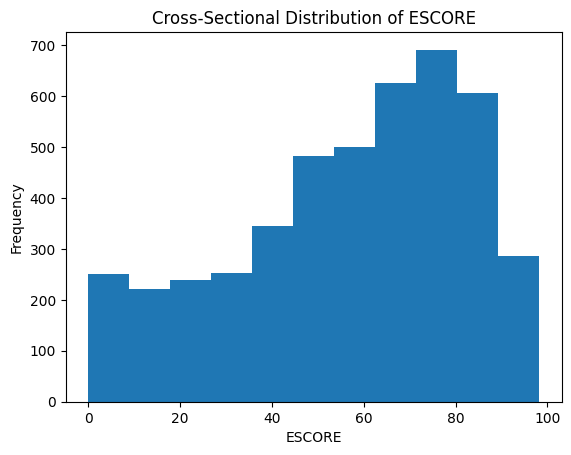

In [224]:
import matplotlib.pyplot as plt

# Assuming 'Merged' is your DataFrame and 'ESCORE' is the column of interest
plt.hist(Merged['ESCORE'], bins=11)  # Adjust 'bins' as needed
plt.xlabel('ESCORE')
plt.ylabel('Frequency')
plt.title('Cross-Sectional Distribution of ESCORE')
plt.show()

**Question 2**

In [183]:
# Filepath init
filepath = 'https://github.com/gr-oll/susFin/raw/refs/heads/main/Data/'

In [184]:
# Extracting the country-region dataset and merging it to the previous one
static = pd.read_excel(filepath + 'Static.xlsx')
df_ex1 = pd.merge(monthly_return_melted, static, on=['Name','ISIN'], how='outer')

In [185]:
# Filtering by non missing escores (2013-2024) complete dataset to allow comparisons
escore = pd.read_excel(filepath + 'DS_EScore_Y.xlsx')
melted_escore = escore.melt(id_vars=["NAME", "ISIN"], var_name="year", value_name="escore")
melted_escore.rename(columns={'NAME': 'Name'}, inplace=True)
melted_escore['year'] = pd.to_datetime(melted_escore['year'], format='%Y')
escore_interest = pd.merge(melted_escore, static, how='outer')
escore_interest = escore_interest[(escore_interest['year'] >= '2013-01-01') & (melted_escore['year'] <= '2024-12-31')]
escore_interest = escore_interest[escore_interest['Region'] == 'PAC']

In [186]:
filtered = escore_interest.groupby('ISIN')['escore'].count().reset_index()
filtered = filtered[filtered['escore'] == 11]

In [187]:
print(filtered)

             ISIN  escore
1    AU000000ALL7      11
2    AU000000AMP6      11
3    AU000000ANN9      11
4    AU000000ANZ3      11
5    AU000000APA1      11
..            ...     ...
493  SG1T75931496      11
495  SG1V61937297      11
497  SG9999000020      11
499  SGXE21576413      11
500  SGXE34184239      11

[409 rows x 2 columns]


In [188]:
interest_companies = filtered['ISIN'].tolist()

In [189]:
print(escore_interest.describe())

                                year       escore
count                           5533  5356.000000
mean   2017-12-31 21:49:05.454545408    55.033236
min              2013-01-01 00:00:00     0.000000
25%              2015-01-01 00:00:00    38.010000
50%              2018-01-01 00:00:00    59.780000
75%              2021-01-01 00:00:00    75.832500
max              2023-01-01 00:00:00    98.210000
std                              NaN    25.889745


In [190]:
print(escore_interest['Name'].describe())

count                        5533
unique                        503
top       YUEXIU PROPERTY COMPANY
freq                           11
Name: Name, dtype: object


In [191]:
escore_interest.isna().any()

,0
Name,False
ISIN,False
year,False
escore,True
Country,False
Region,False


In [192]:
escore_interest.isnull().sum()

,0
Name,0
ISIN,0
year,0
escore,177
Country,0
Region,0


In [193]:
import numpy as np

# Find rows with NaN values
nan_rows = escore_interest[escore_interest.isna().any(axis=1)]

# Print rows and column names with NaN values
for index, row in nan_rows.iterrows():
    nan_cols = row[row.isna()].index.tolist()
    print(f"Row {index}: NaN values in columns {nan_cols}")

Row 299: NaN values in columns ['escore']
Row 724: NaN values in columns ['escore']
Row 1514: NaN values in columns ['escore']
Row 1515: NaN values in columns ['escore']
Row 2900: NaN values in columns ['escore']
Row 4126: NaN values in columns ['escore']
Row 4176: NaN values in columns ['escore']
Row 7179: NaN values in columns ['escore']
Row 8105: NaN values in columns ['escore']
Row 9520: NaN values in columns ['escore']
Row 9521: NaN values in columns ['escore']
Row 9522: NaN values in columns ['escore']
Row 9523: NaN values in columns ['escore']
Row 9524: NaN values in columns ['escore']
Row 9525: NaN values in columns ['escore']
Row 10055: NaN values in columns ['escore']
Row 11046: NaN values in columns ['escore']
Row 11556: NaN values in columns ['escore']
Row 12282: NaN values in columns ['escore']
Row 12283: NaN values in columns ['escore']
Row 13234: NaN values in columns ['escore']
Row 13899: NaN values in columns ['escore']
Row 13900: NaN values in columns ['escore']
Row 1

In [194]:
import numpy as np

# Find rows with NaN values
nan_rows = escore_interest[escore_interest.isna().any(axis=1)]

# Print 'Name' and 'year' for rows with NaN values
for index, row in nan_rows.iterrows():
    print(f"Name: {row['Name']}, Year: {row['year']}")

Name: ABC-MART, Year: 2023-01-01 00:00:00
Name: ADBRI DEAD - DELIST.02/07/24, Year: 2023-01-01 00:00:00
Name: AIR NEW ZEALAND, Year: 2013-01-01 00:00:00
Name: AIR NEW ZEALAND, Year: 2014-01-01 00:00:00
Name: AMPOL, Year: 2023-01-01 00:00:00
Name: ASICS, Year: 2023-01-01 00:00:00
Name: ASMPT, Year: 2023-01-01 00:00:00
Name: BENDIGO & ADELAIDE BANK, Year: 2023-01-01 00:00:00
Name: BORAL DEAD - DELIST.08/07/24, Year: 2023-01-01 00:00:00
Name: CAPCOM, Year: 2013-01-01 00:00:00
Name: CAPCOM, Year: 2014-01-01 00:00:00
Name: CAPCOM, Year: 2015-01-01 00:00:00
Name: CAPCOM, Year: 2016-01-01 00:00:00
Name: CAPCOM, Year: 2017-01-01 00:00:00
Name: CAPCOM, Year: 2018-01-01 00:00:00
Name: CATHAY PACIFIC AIRWAYS, Year: 2023-01-01 00:00:00
Name: CHIN.PWR.INTDVT., Year: 2013-01-01 00:00:00
Name: CHINA RESOURCES POWER, Year: 2023-01-01 00:00:00
Name: CIMIC GROUP DEAD - DELIST.11/05/22, Year: 2022-01-01 00:00:00
Name: CIMIC GROUP DEAD - DELIST.11/05/22, Year: 2023-01-01 00:00:00
Name: COCA-COLA BOTTLERS 